# Featurization and Model Tuning Project

## Data Description:
    The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
    
    Domain: Cement manufacturing
    
    Context:
        Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.
        These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
        
    Attribute Information:
        Cement : measured in kg in a m3 mixture
        Blast : measured in kg in a m3 mixture
        Fly ash : measured in kg in a m3 mixture
        Water : measured in kg in a m3 mixture
        Superplasticizer : measured in kg in a m3 mixture
        Coarse Aggregate : measured in kg in a m3 mixture
        Fine Aggregate : measured in kg in a m3 mixture
        Age : day (1~365)
        Concrete compressive strength measured in MPa
    
    Copyright notice:
        Prof. I-Cheng Yeh and the following published paper: I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).
        
    Solution By: 
        Kartik Thakkar
        Email: kartikthakkar@outlook.com
        Github: https://github.com/code-animator

In [226]:
#Let's import all the libraries
from time import time
import numpy as np   
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.cluster import AgglomerativeClustering 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

In [66]:
#Load and review the data
inpdf=pd.read_csv('concrete.csv')
inpdf.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


#### Observations:
    1) There is a presence of 0 values in features slag, ash, superplastic as observed from the first 10 rows of the dataset. We will have to verify if these need to be treated as we progress ahead.
    2) The dataset has 8 independent features and 1 dependent feature - strength.
    3) From the problem statement it is understood that this is a problem of regression type. Therefore our choice of models will be based on this.

In [67]:
inpdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [68]:
#Let's measure the skewness of all the features including the target feature strength.
#Measure of skewness of columns
print(inpdf.skew())

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64


#### Observation: Feature water seems to have a near normal disctribution. Features coarseagg and fineagg appear to have a long left tail.
Let's go through a univariate analysis of each feature to understand them better.

Interquartile range of cement is:  157.625
Skew of cement is: 0.5094811788717731
Interquartile range of slag is:  142.95
Skew of cement is: 0.8007168956061774
Interquartile range of ash is:  118.3
Skew of cement is: 0.5373539058066844
Interquartile range of water is:  27.099999999999994
Skew of cement is: 0.07462838428549402
Interquartile range of superplastic is:  10.2
Skew of cement is: 0.9072025748672466
Interquartile range of coarseagg is:  97.40000000000009
Skew of cement is: -0.04021974481106704
Interquartile range of fineagg is:  93.05000000000007
Skew of cement is: -0.25300959769707143
Interquartile range of age is:  49.0
Skew of cement is: 3.2691774006345895
Interquartile range of strength is:  22.425000000000008
Skew of cement is: 0.41697728841071807


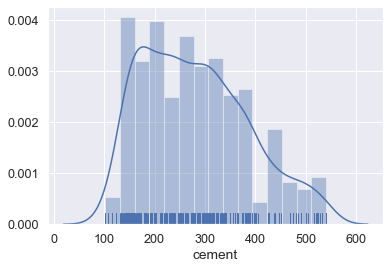

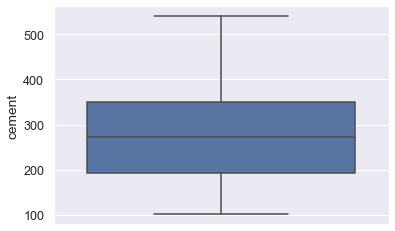

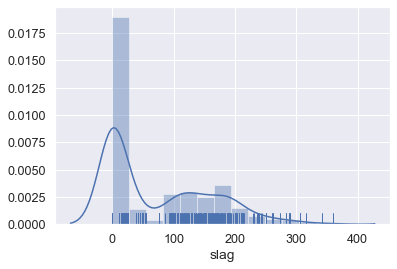

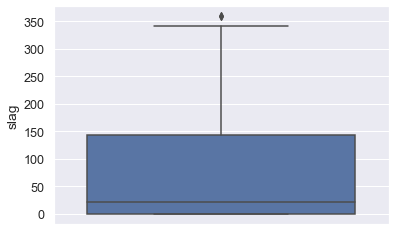

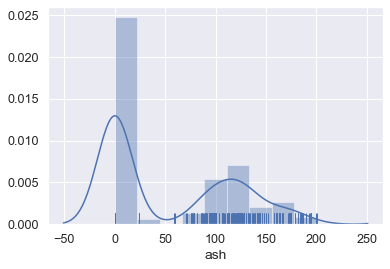

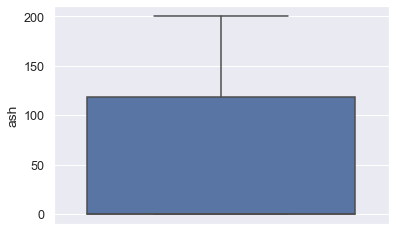

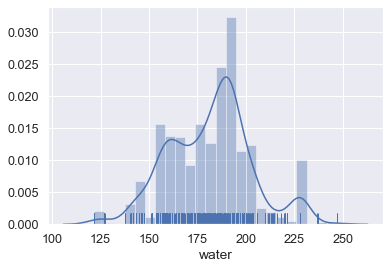

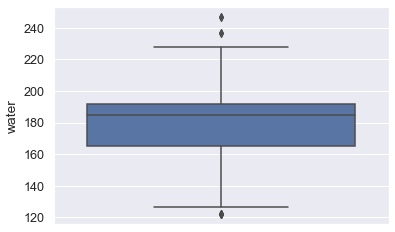

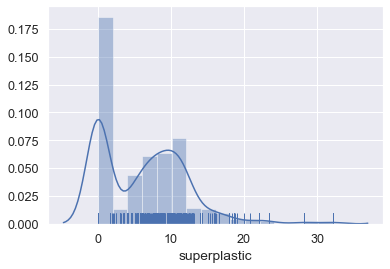

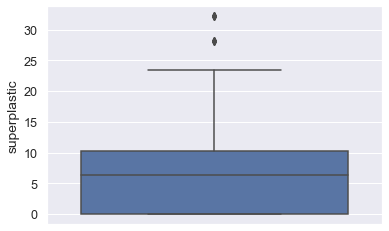

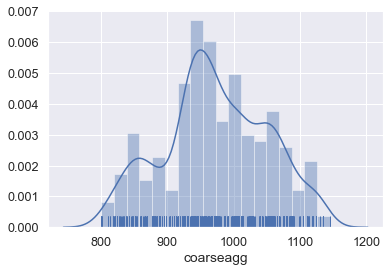

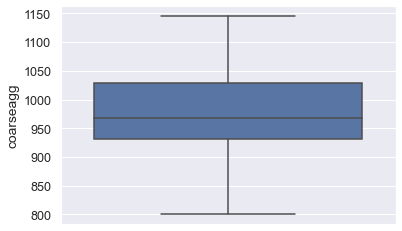

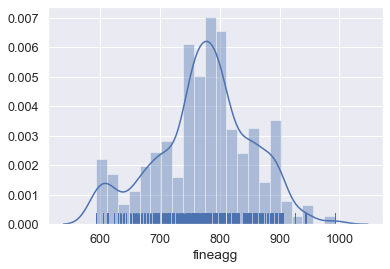

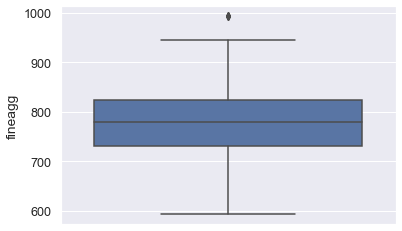

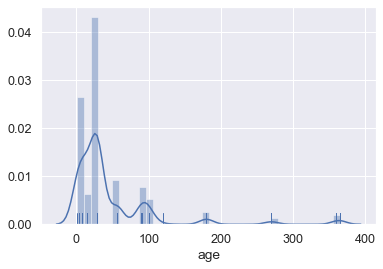

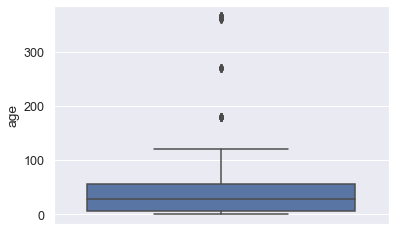

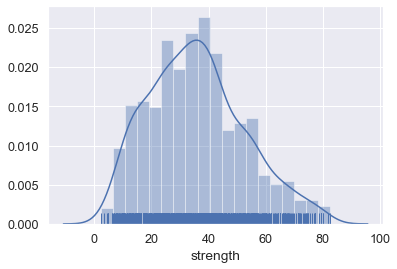

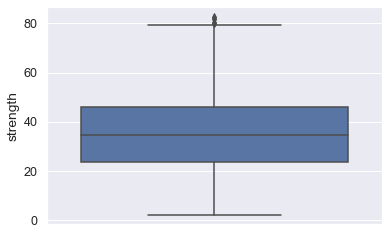

<Figure size 432x288 with 0 Axes>

In [69]:
#Let's loop through each of the features and get a distplot, boxplot and IQR
cols=inpdf.columns
#print(cols)
j=0
iqr=[]
low=[]
high=[]
for i in cols:
    #print(i)
    #print(inpdf[i])
    sns.distplot(inpdf[i],kde=True,rug=True);
    plt.figure()
    sns.boxplot(y=inpdf[i])
    plt.figure()
    q1=inpdf[i].quantile(0.25)
    q3=inpdf[i].quantile(0.75)
    iqr.append(q3 - q1)
    low.append(q1-1.5*iqr[j])
    high.append(q3+1.5*iqr[j])
    print("Interquartile range of", i, "is: ",iqr[j])
    print("Skew of cement is:", inpdf[i].skew())
    j=j+1

#### Observations:
    slag, water, superplastic, fineagg, age, strength have some outliers (these will have to be managed as we progress further before we get into model building.)
    2 clusters are visible from the distplot of ash, superplastic and fineagg
    slag appears to have 2 visible clusters too with a long tail
    water, coarseagg has 3 visible clusters
    the boxplot of ash indicates majority of the values are in q1. This is confirmed from the box plot as majority of the values are in the range of 0-25.
    age appears to have 5 clusters denoted by the 5 peaks.


In [70]:
inpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Note:
        As per the description of the data given at the source https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength, the data set does not consist of any missing values.
        This indicates that the 0 values observed in the features slag, ash, superplastic are acceptable and must not be replaced.


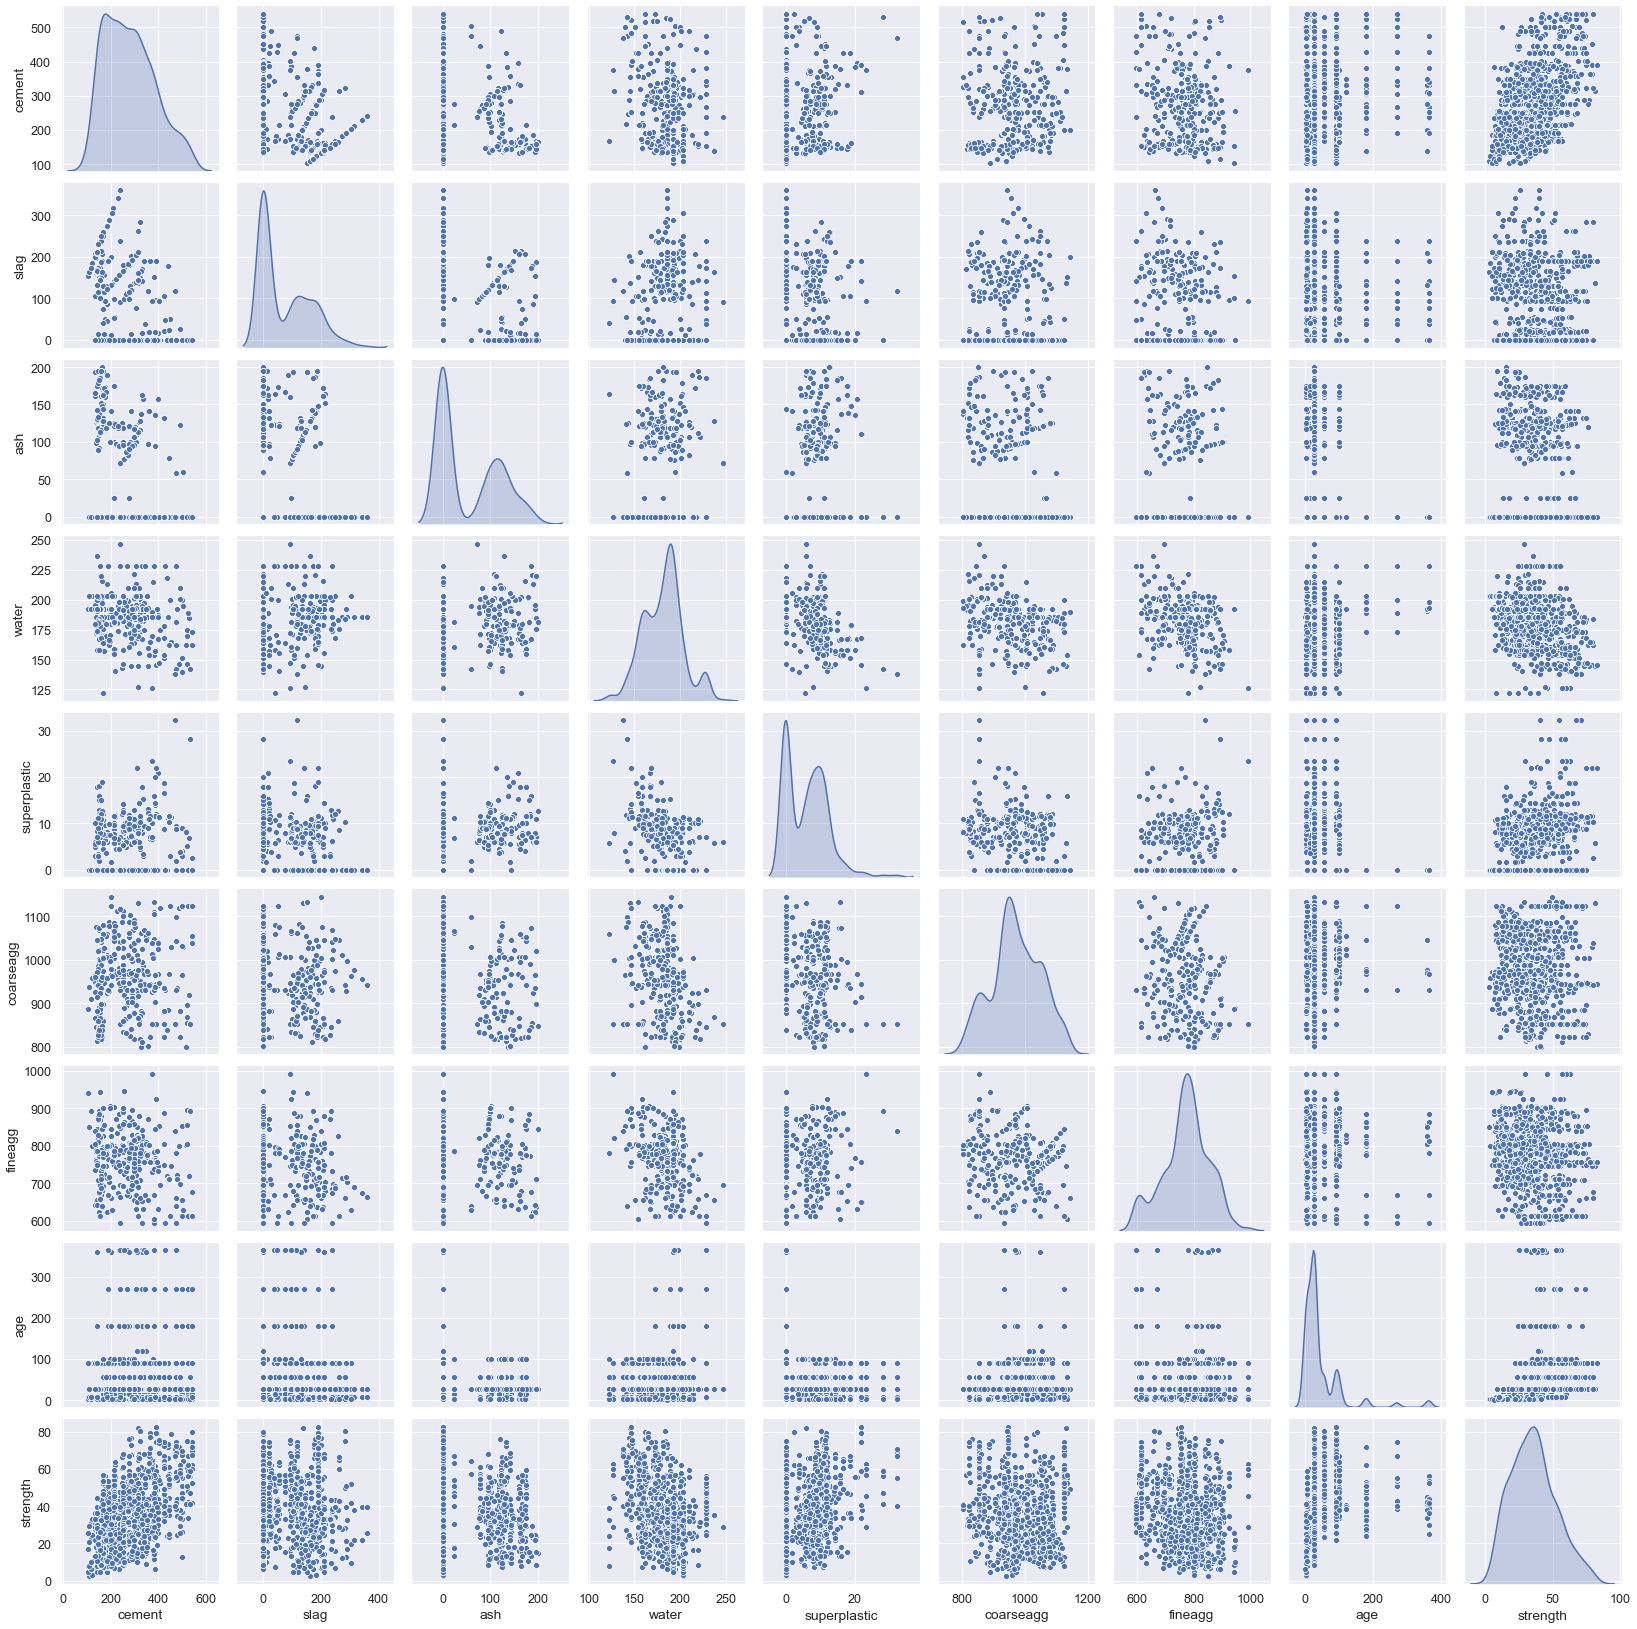

In [71]:
#Let's do a mutivariate analysis by creating a pairplot
sns.pairplot(inpdf,diag_kind='kde')

#### Observations:
    Pairplots of cement to slag and slag to ash indicates that there are 3 clusters

In [72]:
#Let's verify the correlation of each of the features. This will helps us identify features that could be potentially dropped before we move to model building.
cor=inpdf.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


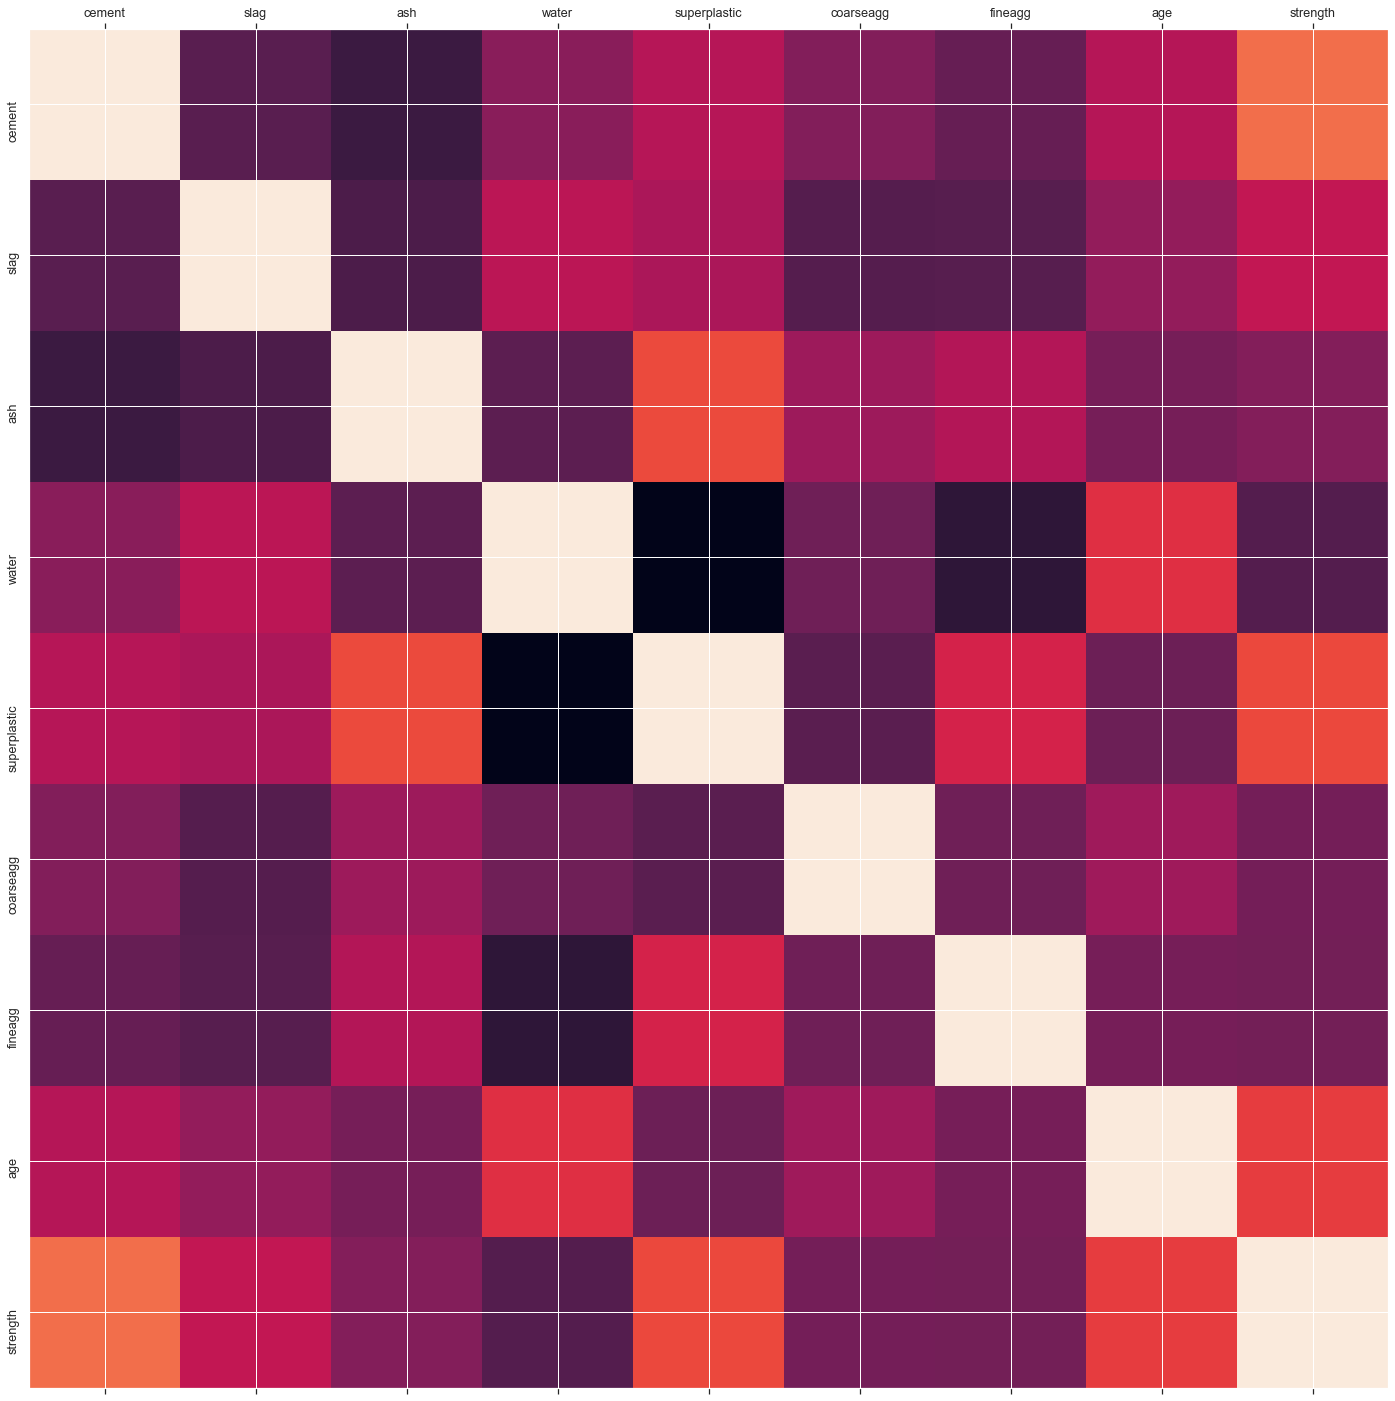

In [73]:
#Let's look at the heatmap derived from correlation to aid our visual analysis.
def plot_corr(ldf, size=25):
    corr = ldf.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.yticks(rotation = 90)
    plt.xticks(rotation = 0) 
plot_corr(inpdf)

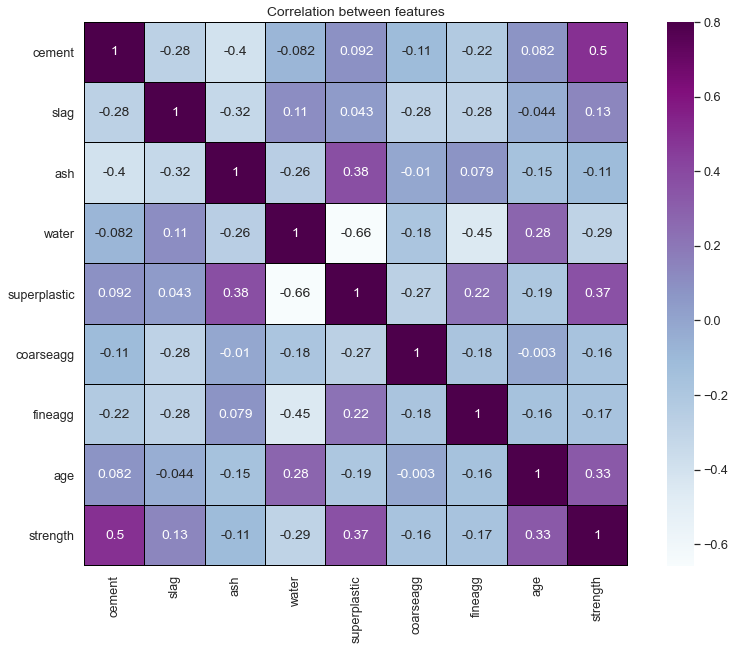

In [74]:
#Here is an alternative form of heatmap with correlation labels in each field.
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

#### Observations:
    None of the features seem to be highly correlated (+/- 0.90). Therefore, we will continue using all the independent features for our model building exercise.

In [75]:
inpdf.shape

(1030, 9)

In [76]:
#Let's identify all columns having missing values
missing_values_cols=inpdf.columns[inpdf.isnull().any()]
# Number of missing values in each column
inpdf[missing_values_cols].isnull().sum()

Series([], dtype: float64)

#### Observation: 
    The data appears to have no missing values. This confirms the description of the data given at the source https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength that the data set does not consist of any missing values.

In [77]:
# since slag, water, superplastic, fineagg, age (index 1, 4, 5, 7, 8 of the iqr array) have some outliers, let's handle them.
# Let's print the number of outliers in each feature.
#q1 = inpdf.quantile(0.25)
#q3 = inpdf.quantile(0.75)
#iqr1 = q3 - q1
#((inpdf < (q1 - 1.5 * iqr1)) | (inpdf > (q3 + 1.5 * iqr1))).sum()
((inpdf < low) | (inpdf > high)).sum()

cement           0
slag             2
ash              0
water            9
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         4
dtype: int64

In [78]:
inpdf.columns[:-1]

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [79]:
iqr,low,high

([157.625,
  142.95,
  118.3,
  27.099999999999994,
  10.2,
  97.40000000000009,
  93.05000000000007,
  49.0,
  22.425000000000008],
 [-44.0625,
  -214.42499999999998,
  -177.45,
  124.25000000000001,
  -15.299999999999999,
  785.8999999999999,
  591.3749999999998,
  -66.5,
  -9.927500000000013],
 [586.4375,
  357.375,
  295.75,
  232.64999999999998,
  25.5,
  1175.5000000000002,
  963.575,
  129.5,
  79.77250000000001])

In [80]:
#Let's replace the outliers with median values of each column
cntr_j=0
for col_name in inpdf.columns[:-1]:
    inpdf.loc[(inpdf[col_name] < low[cntr_j]) | (inpdf[col_name] > high[cntr_j]), col_name] = inpdf[col_name].median()
    cntr_j=cntr_j+1

In [81]:
#Let's verify the replacements
((inpdf < low) | (inpdf > high)).sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        4
dtype: int64

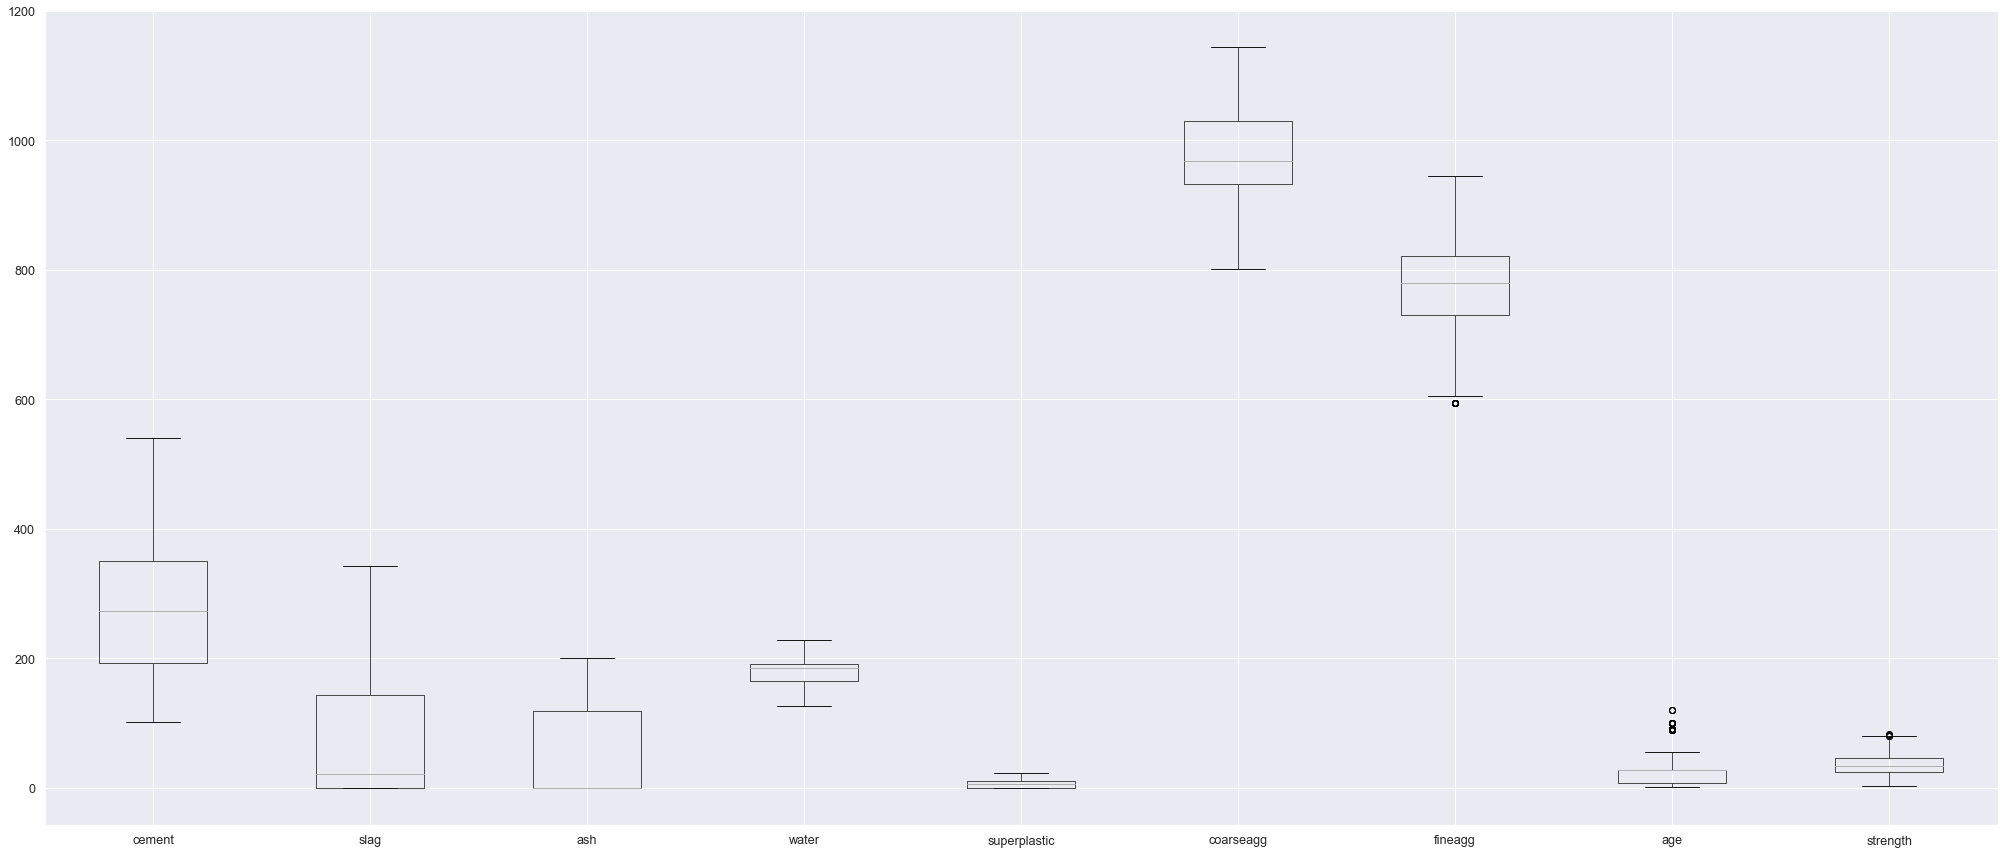

In [82]:
inpdf.boxplot(figsize=(35,15))

#### Note:
    The replacement of values with median has created new outliers in fineagg and age.
    We do not replace those further.

In [92]:
#Let's evaluate if we could reduce the number of features to reduce the overall model complexity.
#Given that all the numbers in the features in the dataset are numeric and could have different units of measurement, let's scale the data.

from scipy.stats import zscore
#X = inpdf.drop('strength',axis=1)
XScaled_w=inpdf.apply(zscore)
XScaled = XScaled_w.drop('strength',axis=1)
XScaled

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159
...,...,...,...,...,...,...,...,...
1025,-1.399330,-0.858192,1.747988,-0.080274,0.735483,-0.153365,0.412559,-0.153159
1026,2.394626,-0.858192,-0.847144,-1.935256,0.077890,-1.554617,1.540125,-1.052756
1027,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159
1028,0.582373,-0.412930,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159


In [93]:
#PCA for dimensionality reduction
pca = PCA(n_components=8)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
#Eigen values
print(pca.explained_variance_)

[2.17110218 1.40569608 1.30106667 1.01462665 0.98827003 0.90796844
 0.17591584 0.04312865]


In [95]:
#Eigen vectors
print(pca.components_)

[[ 0.13864521  0.20081759 -0.45490138  0.54199264 -0.52861741  0.02304487
  -0.38833488 -0.09480036]
 [-0.29239212  0.70406079 -0.0025718   0.06674956  0.28061655 -0.57624286
  -0.05444886 -0.02402029]
 [ 0.77120428 -0.00894784 -0.39249647 -0.2880307   0.26704682 -0.29722932
  -0.03153016 -0.08657547]
 [ 0.09509706  0.18747591  0.26641744 -0.12926325  0.32661666  0.39814401
  -0.7760181  -0.02684963]
 [ 0.07667113  0.04154168 -0.07716533  0.03921546  0.00438424 -0.01723948
  -0.05487116  0.99074529]
 [ 0.19666184 -0.42074745  0.51294037  0.44521204  0.04730558 -0.52061206
  -0.22291151  0.00313743]
 [ 0.18391885  0.23957687  0.40296876 -0.50000275 -0.67562761 -0.18299729
  -0.0769803   0.02244038]
 [-0.4616323  -0.43885329 -0.36956767 -0.39033759 -0.07138518 -0.3401868
  -0.42942606  0.0114048 ]]


In [96]:
#percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[0.27112429 0.17554142 0.16247544 0.1267052  0.12341382 0.11338586
 0.02196813 0.00538585]


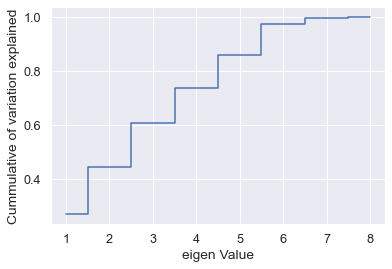

In [97]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Observation:
    It appears that 6 features help define more than 95% of the variance. 7 features explain ~100% of the variance.
    We will therefore continue with model building with 7 features.

In [127]:
#Models that we will use for this problem are SVR, Decision Tree Regression (DTR). However, other methods such as Linear Regression (LR), Logistic Regression (LoR) can also be employed.
#We will also look at feature importance in DTR.
#For X we will use XScaled that consists of all the independent features.
y = XScaled_w['strength']
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

## Decision Tree Regressor

In [128]:
DTregressor = DecisionTreeRegressor()

DTregressor.fit(X_train , y_train)
feature_importances = DTregressor.feature_importances_
feature_names = XScaled.columns
k = 8
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(pd.DataFrame(feature_importances,columns=['Imp'],index=feature_names))

                   Imp
cement        0.348117
slag          0.094450
ash           0.011846
water         0.127989
superplastic  0.018689
coarseagg     0.036341
fineagg       0.033843
age           0.328725


In [129]:
y_pred = DTregressor.predict(X_test)
# performance on train data
print('Performance on training data using DT:',DTregressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',DTregressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.841677275445392
Accuracy DT:  0.841677275445392
MSE:  0.16526678954817803


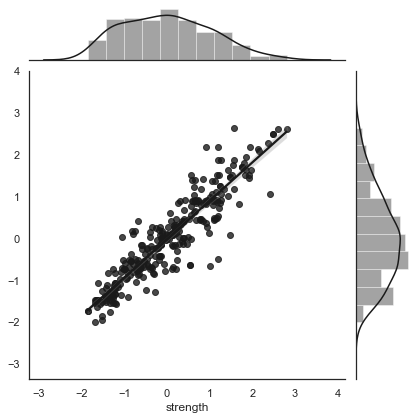

In [130]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [126]:
#Let's drop superplastic, ash based on the importance matrix and observe model performance
print(XScaled.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


In [137]:
XScaled_iter=XScaled.drop(['superplastic','ash'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(XScaled_iter, y, test_size=0.30, random_state=1)
XScaled_iter

,cement,slag,water,coarseagg,fineagg,age
0,-1.339017,1.625902,1.060879,-0.014398,-0.305676,-0.153159
1,-1.074790,-0.363717,-1.134020,1.388141,0.300692,-0.656933
2,-0.298384,-0.858192,0.279067,-0.206121,1.126981,-0.153159
3,-0.145209,0.477594,2.250592,-0.526517,-1.303578,-0.153159
4,-1.209776,1.290784,0.565570,0.958372,-0.964165,-0.153159
...,...,...,...,...,...,...
1025,-1.399330,-0.858192,-0.080274,-0.153365,0.412559,-0.153159
1026,2.394626,-0.858192,-1.935256,-1.554617,1.540125,-1.052756
1027,-0.045645,0.501029,-0.099698,-1.323005,-0.053976,-0.153159
1028,0.582373,-0.412930,2.250592,-0.526517,-1.303578,-0.153159


In [139]:
DT1regressor = DecisionTreeRegressor()
DT1regressor.fit(X_train , y_train)
feature_importances = DT1regressor.feature_importances_
feature_names = XScaled_iter.columns
k = 6
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(pd.DataFrame(feature_importances,columns=['Imp'],index=feature_names))

                Imp
cement     0.365485
slag       0.097438
water      0.138787
coarseagg  0.035694
fineagg    0.033730
age        0.328866


In [140]:
y_pred = DT1regressor.predict(X_test)
# performance on train data
print('Performance on training data using DT:',DT1regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',DT1regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9911573898347996
Performance on testing data using DT: 0.8604868082788781
Accuracy DT:  0.8604868082788781
MSE:  0.14563226700546428


In [163]:
#Model performance with all features
#Performance on training data using DT: 0.9917907393004437
#Performance on testing data using DT: 0.841677275445392
#Accuracy DT:  0.841677275445392
#MSE:  0.16526678954817803

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
print(kfold)
#model = DTregressor
results = cross_val_score(DTregressor, XScaled, y, cv=kfold)
print(results)
print("Accuracy DT KFold: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\Kartik\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KFold(n_splits=50, random_state=7, shuffle=False)
[0.6389195  0.86790303 0.62389182 0.77724002 0.83833064 0.66471799
 0.86453173 0.86899888 0.95405482 0.73615204 0.92652506 0.93363939
 0.96176757 0.92288856 0.91019409 0.77651346 0.75007156 0.91174646
 0.84214078 0.94433131 0.936095   0.69113531 0.96470643 0.71443394
 0.88400954 0.8891064  0.83173437 0.9262647  0.90870638 0.89598449
 0.80720627 0.93226791 0.85081949 0.93351839 0.88702016 0.89831926
 0.69483762 0.81827996 0.86575406 0.80965736 0.89135448 0.76412976
 0.92754328 0.84847709 0.87990215 0.8046465  0.84197818 0.81273025
 0.92641885 0.93978995]
Accuracy DT KFold: 84.983% (8.727%)


In [167]:
#Let's find the best combination of hyperparameters for two of the regression techniques employed in this notebook.


dtr = DecisionTreeRegressor()
svr = SVR()
lr = LinearRegression()
lor =  LogisticRegression()
for clf, label in zip([dtr,svr,lr,lor], 
    ['dtr' , 'svr', 'lr', 'lor']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params())

model name:  dtr

 model_hyperparameters 
 {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
model name:  svr

 model_hyperparameters 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
model name:  lr

 model_hyperparameters 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
model name:  lor

 model_hyperparameters 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start':

In [193]:
param_dist = {"criterion": ["mse", "friedman_mse", "mae"],
             "splitter":["best","random"],
             "max_depth":[1,3,6,10,20],
             "max_features":[5,6,7,8],
             "max_leaf_nodes":[3,6,8]
             }

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(dtr, param_distributions=param_dist, n_iter=samples)

In [194]:
randomCV.fit(XScaled, y)
print(randomCV.best_params_)

{'splitter': 'best', 'max_leaf_nodes': 6, 'max_features': 6, 'max_depth': 6, 'criterion': 'mae'}


In [200]:
#Let's try with the randomCV best params

DT2regressor = DecisionTreeRegressor(splitter='best', max_leaf_nodes=6, max_features=6, max_depth=6, criterion= 'mae')
DT2regressor.fit(X_train , y_train)
feature_importances = DT2regressor.feature_importances_
feature_names = XScaled_iter.columns
print(pd.DataFrame(feature_importances,columns=['Imp'],index=feature_names))

                Imp
cement     0.478879
slag       0.000000
water      0.117307
coarseagg  0.000000
fineagg    0.000000
age        0.403814


In [201]:
y_pred = DT2regressor.predict(X_test)
# performance on train data
print('Performance on training data using DT:',DT2regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',DT2regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT_ran=metrics.r2_score(y_test, y_pred)
print('Accuracy DT Random Search CV: ',acc_DT_ran)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.5984333492954039
Performance on testing data using DT: 0.560951483965527
Accuracy DT Random Search CV:  0.560951483965527
MSE:  0.4583052679584348


In [202]:
#Model performance has fallen drastically, indicating that parameters opted for with Random Search CV are not the best for the given model.

## SVR

In [203]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [204]:
y_pred = svr_model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',svr_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',svr_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_svr=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_svr)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7088520921319565
Performance on testing data using SVR: 0.6797966870907337
Accuracy SVR:  0.6797966870907337
MSE:  0.33424749148346367


In [205]:
num_folds = 8
seed = 11
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(svr_model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\Kartik\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7032438037589257
Standard Deviation:  0.04169606770087187


In [230]:
#Performance of SVR improved with Kfold CV
inpdf.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


### Bootstrapping Confidence Interval

In [231]:
# configure bootstrap
values = inpdf.values
# Number of bootstrap samples to create
n_iterations = 500        
# size of a bootstrap sample
n_size = int(len(inpdf) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

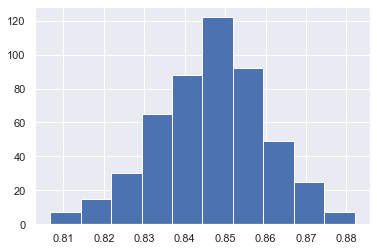

95.0 confidence interval 81.8% and 87.2%


In [232]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))